In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from pathlib import Path

# Créer le dossier img s'il n'existe pas
img_folder = Path('../img')
img_folder.mkdir(exist_ok=True)
print(f"Dossier {img_folder} créé/vérifié avec succès")

#Partie 1 — Chargement et préparation des données

#1. Importez le dataset dans Python.
df = pd.read_csv("../data_clean/cancer_research_vs_mortality.csv", encoding="utf-8")

# Rename columns to have proper capitalization
df.columns = df.columns.str.strip()
column_mapping = {
    'cancer': 'Cancer',
    'publications_2024': 'Publications_2024',
    'mortality_2022': 'Mortality_2022',
    'publications_per_1000_deaths': 'Publications_per_1000_deaths'
}
df = df.rename(columns=column_mapping)

#2
print(df.head())

print(df.info())

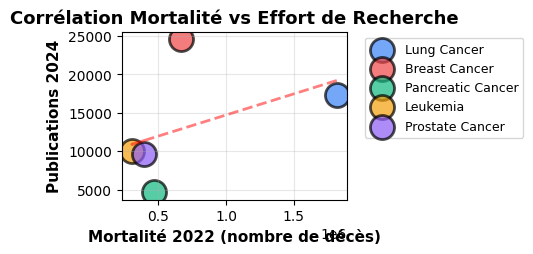

In [27]:
# 2. Scatter plot : Corrélation Mortalité vs Publications
ax2 = plt.subplot(2, 2, 2)
colors = ['#3b82f6', '#ef4444', '#10b981', '#f59e0b', '#8b5cf6']
for i, cancer in enumerate(df['Cancer']):
    ax2.scatter(df.loc[i, 'Mortality_2022'], df.loc[i, 'Publications_2024'], 
               s=300, c=colors[i], alpha=0.7, edgecolors='black', linewidth=2,
               label=cancer)

ax2.set_xlabel('Mortalité 2022 (nombre de décès)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Publications 2024', fontsize=11, fontweight='bold')
ax2.set_title('Corrélation Mortalité vs Effort de Recherche', fontsize=13, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

# Ajouter une ligne de tendance
z = np.polyfit(df['Mortality_2022'], df['Publications_2024'], 1)
p = np.poly1d(z)
ax2.plot(df['Mortality_2022'], p(df['Mortality_2022']), 
         "r--", alpha=0.5, linewidth=2, label='Tendance')








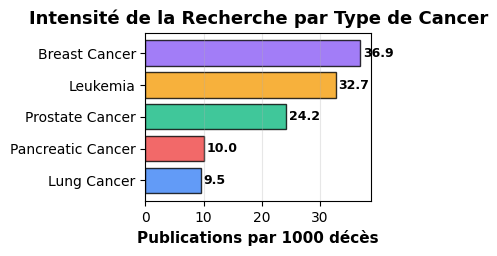

In [28]:
# 3. Graphique en barres horizontales : Publications par 1000 décès
ax3 = plt.subplot(2, 2, 3)
df_sorted = df.sort_values('Publications_per_1000_deaths', ascending=True)
bars = ax3.barh(df_sorted['Cancer'], df_sorted['Publications_per_1000_deaths'], 
                color=colors, alpha=0.8, edgecolor='black')

ax3.set_xlabel('Publications par 1000 décès', fontsize=11, fontweight='bold')
ax3.set_title('Intensité de la Recherche par Type de Cancer', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{width:.1f}', ha='left', va='center', fontweight='bold', fontsize=9)


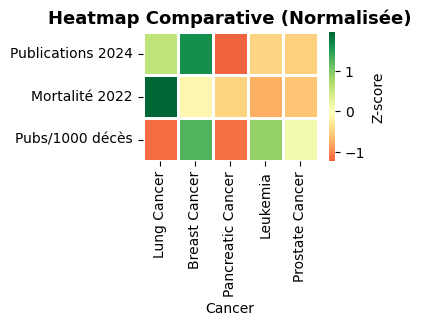

In [29]:
ax4 = plt.subplot(2, 2, 4)
heatmap_data = df[['Publications_2024', 'Mortality_2022', 'Publications_per_1000_deaths']].T
heatmap_data.columns = df['Cancer']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heatmap_normalized = pd.DataFrame(
    scaler.fit_transform(heatmap_data.T).T,
    columns=heatmap_data.columns,
    index=heatmap_data.index
)

sns.heatmap(heatmap_normalized, annot=False, cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Z-score'}, ax=ax4, linewidths=1)
ax4.set_title('Heatmap Comparative (Normalisée)', fontsize=13, fontweight='bold')
ax4.set_yticklabels(['Publications 2024', 'Mortalité 2022', 'Pubs/1000 décès'], rotation=0)

plt.tight_layout()




In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_budget = pd.read_csv('../data_clean/nci_budget_2023.csv')
df_mortality = pd.read_csv('../data_clean/cancer_research_vs_mortality.csv')

# Rename columns to have proper capitalization for both dataframes
df_budget.columns = df_budget.columns.str.strip()
budget_column_mapping = {
    'cancer': 'Cancer',
    'budget_2023_million_usd': 'Budget_2023_Million_USD'
}
df_budget = df_budget.rename(columns=budget_column_mapping)

df_mortality.columns = df_mortality.columns.str.strip()
mortality_column_mapping = {
    'cancer': 'Cancer',
    'publications_2024': 'Publications_2024',
    'mortality_2022': 'Mortality_2022',
    'publications_per_1000_deaths': 'Publications_per_1000_deaths'
}
df_mortality = df_mortality.rename(columns=mortality_column_mapping)

In [31]:
# Columns are already stripped and renamed in the previous cell

# Fusionner les données
df_budget_merged = pd.merge(df_budget, df_mortality[['Cancer', 'Mortality_2022']], on='Cancer', how='left')

# Calculer le budget par décès
df_budget_merged['Budget_per_death'] = (df_budget_merged['Budget_2023_Million_USD'] * 1_000_000) / df_budget_merged['Mortality_2022']

print("=== Aperçu des données ===")
print(df_budget_merged)

=== Aperçu des données ===
              Cancer  Budget_2023_Million_USD  Mortality_2022  \
0      Breast Cancer                    542.0          666103   
1           Leukemia                    270.6          305405   
2        Lung Cancer                    435.0         1817469   
3  Pancreatic Cancer                    246.0          467409   
4    Prostate Cancer                    258.6          397430   

   Budget_per_death  
0        813.687973  
1        886.036574  
2        239.343835  
3        526.305655  
4        650.680623  


Text(0.5, 1.0, 'Répartition du Budget NCI 2023')

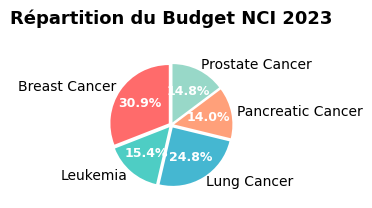

In [32]:
ax1 = plt.subplot(2, 3, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
wedges, texts, autotexts = ax1.pie(df_budget_merged['Budget_2023_Million_USD'], 
                                     labels=df_budget_merged['Cancer'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     explode=[0.05] * len(df_budget_merged))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

ax1.set_title('Répartition du Budget NCI 2023', fontsize=13, fontweight='bold', pad=20)

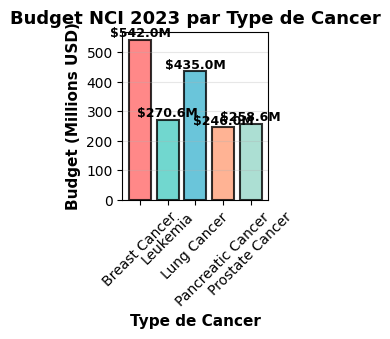

In [33]:
ax2 = plt.subplot(2, 3, 2)
bars = ax2.bar(df_budget_merged['Cancer'], df_budget_merged['Budget_2023_Million_USD'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax2.set_ylabel('Budget (Millions USD)', fontsize=11, fontweight='bold')
ax2.set_title('Budget NCI 2023 par Type de Cancer', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.1f}M',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

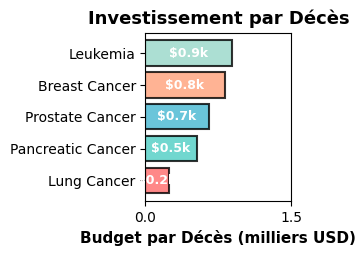

In [34]:
ax3 = plt.subplot(2, 3, 3)
df_sorted_budget = df_budget_merged.sort_values('Budget_per_death', ascending=True)
bars_h = ax3.barh(df_sorted_budget['Cancer'], df_sorted_budget['Budget_per_death']/1000, 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Budget par Décès (milliers USD)', fontsize=11, fontweight='bold')
ax3.set_title('Investissement par Décès', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
max_x = df_sorted_budget['Budget_per_death'].max() / 1000
ax3.set_xticks(np.arange(0, max_x + 2, 1.5))


# Ajouter les valeurs
for bar in bars_h:
    width = bar.get_width()
    ax3.text(width / 2,
             bar.get_y() + bar.get_height() / 2,
             f'${width:.1f}k',
             ha='center', va='center',
             fontweight='bold', fontsize=9,
             color='white')

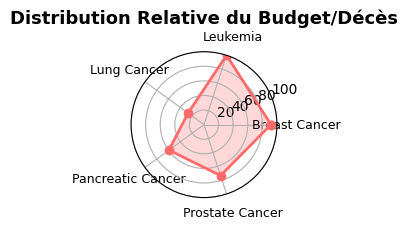

In [35]:
ax5 = plt.subplot(2, 3, 5, projection='polar')
angles = np.linspace(0, 2 * np.pi, len(df_budget_merged), endpoint=False).tolist()
values = (df_budget_merged['Budget_per_death'] / df_budget_merged['Budget_per_death'].max() * 100).tolist()
angles += angles[:1]
values += values[:1]

ax5.plot(angles, values, 'o-', linewidth=2, color='#FF6B6B')
ax5.fill(angles, values, alpha=0.25, color='#FF6B6B')
ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(df_budget_merged['Cancer'], fontsize=9)
ax5.set_ylim(0, 100)
ax5.set_title('Distribution Relative du Budget/Décès', fontsize=13, fontweight='bold', pad=20)
ax5.grid(True)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_trials = pd.read_csv('../data_clean/clinical_trials_geography_count.csv')

# Rename columns to have proper capitalization
df_trials.columns = df_trials.columns.str.strip()
trials_column_mapping = {
    'cancer': 'Cancer',
    'asia': 'Asia',
    'canada': 'Canada',
    'europe': 'Europe',
    'latin_america': 'Latin America',
    'middle_east': 'Middle East',
    'oceania': 'Oceania',
    'other': 'Other',
    'usa': 'USA'
}
df_trials = df_trials.rename(columns=trials_column_mapping)

regions = ['Asia', 'Canada', 'Europe', 'Latin America', 'Middle East', 'Oceania', 'USA', 'Other']

# Calculer le total par cancer
df_trials['Total_Trials'] = df_trials[regions].sum(axis=1)

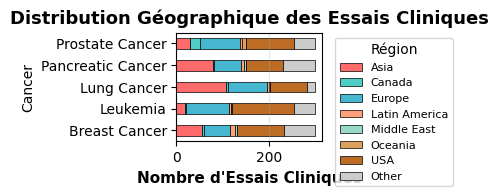

In [37]:
ax1 = plt.subplot(3, 3, 1)
df_plot = df_trials.set_index('Cancer')[regions]
df_plot.plot(kind='barh', stacked=True, ax=ax1, 
             color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#DDA15E', '#BC6C25', '#CCCCCC'],
             edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Nombre d\'Essais Cliniques', fontsize=11, fontweight='bold')
ax1.set_title('Distribution Géographique des Essais Cliniques', fontsize=13, fontweight='bold')
ax1.legend(title='Région', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(axis='x', alpha=0.3)

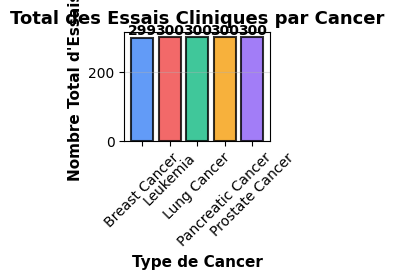

In [38]:
ax2 = plt.subplot(3, 3, 2)
colors_cancer = ['#3b82f6', '#ef4444', '#10b981', '#f59e0b', '#8b5cf6']
bars = ax2.bar(df_trials['Cancer'], df_trials['Total_Trials'], 
               color=colors_cancer, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax2.set_ylabel('Nombre Total d\'Essais', fontsize=11, fontweight='bold')
ax2.set_title('Total des Essais Cliniques par Cancer', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.4)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

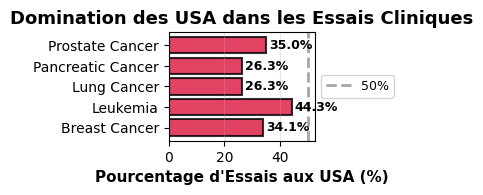

In [39]:
ax3 = plt.subplot(3, 3, 3)
df_trials['USA_Percentage'] = (df_trials['USA'] / df_trials['Total_Trials'] * 100)
bars_usa = ax3.barh(df_trials['Cancer'], df_trials['USA_Percentage'], 
                     color='#DC143C', alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Pourcentage d\'Essais aux USA (%)', fontsize=11, fontweight='bold')
ax3.set_title('Domination des USA dans les Essais Cliniques', fontsize=13, fontweight='bold')
ax3.axvline(x=50, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='50%')
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)
ax3.grid(axis='x', alpha=0.3)

for bar in bars_usa:
    width = bar.get_width()
    ax3.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            ha='left', va='center', fontweight='bold', fontsize=9)

Text(50.72222222222221, 0.5, '')

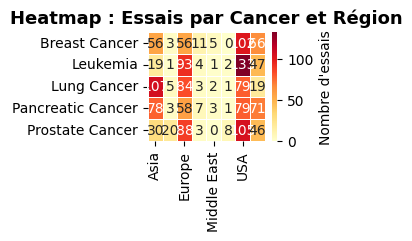

In [40]:
ax4 = plt.subplot(3, 3, 4)
heatmap_data = df_trials.set_index('Cancer')[regions]
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Nombre d\'essais'}, ax=ax4, linewidths=0.5)
ax4.set_title('Heatmap : Essais par Cancer et Région', fontsize=13, fontweight='bold')
ax4.set_xlabel('')
ax4.set_ylabel('')

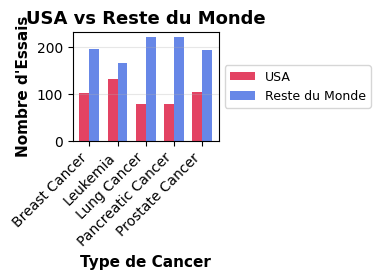

In [41]:
ax5 = plt.subplot(3, 3, 5)
df_trials['Rest_of_World'] = df_trials['Total_Trials'] - df_trials['USA']
x = np.arange(len(df_trials))
width = 0.35

bars1 = ax5.bar(x - width/2, df_trials['USA'], width, label='USA', color='#DC143C', alpha=0.8)
bars2 = ax5.bar(x + width/2, df_trials['Rest_of_World'], width, label='Reste du Monde', color='#4169E1', alpha=0.8)

ax5.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax5.set_ylabel('Nombre d\'Essais', fontsize=11, fontweight='bold')
ax5.set_title('USA vs Reste du Monde', fontsize=13, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(df_trials['Cancer'], rotation=45, ha='right')
ax5.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=9)
ax5.grid(axis='y', alpha=0.3)

Text(0.5, 1.0, 'Répartition Globale par Région')

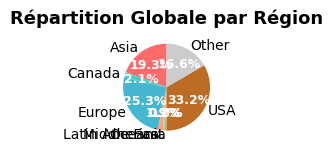

In [42]:
ax6 = plt.subplot(3, 3, 6)
total_by_region = df_trials[regions].sum()
colors_regions = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#DDA15E', '#BC6C25', '#CCCCCC']
wedges, texts, autotexts = ax6.pie(total_by_region, 
                                     labels=regions,
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors_regions)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)
ax6.set_title('Répartition Globale par Région', fontsize=13, fontweight='bold')

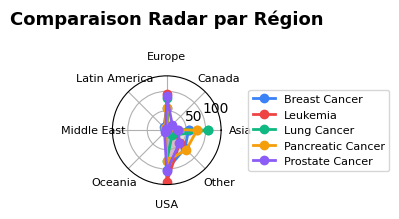

In [43]:
ax7 = plt.subplot(3, 3, 7, projection='polar')
for i, cancer in enumerate(df_trials['Cancer']):
    angles = np.linspace(0, 2 * np.pi, len(regions), endpoint=False).tolist()
    values = df_trials.loc[i, regions].tolist()
    angles += angles[:1]
    values += values[:1]
    
    ax7.plot(angles, values, 'o-', linewidth=2, label=cancer, color=colors_cancer[i])
    ax7.fill(angles, values, alpha=0.15, color=colors_cancer[i])

ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(regions, fontsize=8)
ax7.set_title('Comparaison Radar par Région', fontsize=13, fontweight='bold', pad=20)
ax7.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=8)
ax7.grid(True)

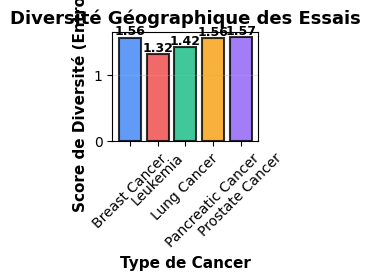

In [44]:
ax8 = plt.subplot(3, 3, 8)
df_diversity = df_trials.copy()
# Calculer l'entropie de Shannon pour mesurer la diversité géographique
from scipy.stats import entropy
df_diversity['Geographic_Diversity'] = df_diversity[regions].apply(
    lambda row: entropy(row + 0.001), axis=1  # +0.001 pour éviter log(0)
)

bars_div = ax8.bar(df_diversity['Cancer'], df_diversity['Geographic_Diversity'],
                   color=colors_cancer, alpha=0.8, edgecolor='black', linewidth=1.5)
ax8.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax8.set_ylabel('Score de Diversité (Entropie)', fontsize=11, fontweight='bold')
ax8.set_title('Diversité Géographique des Essais', fontsize=13, fontweight='bold')
ax8.tick_params(axis='x', rotation=45)
ax8.grid(axis='y', alpha=0.3)

for bar in bars_div:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

Text(0.5, 1.0, 'Résumé : Top 3 Régions par Cancer')

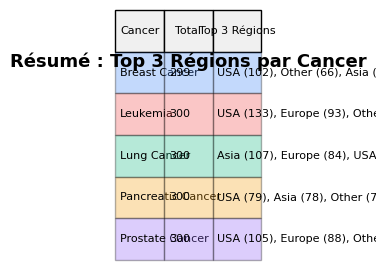

In [45]:
ax9 = plt.subplot(3, 3, 9)
ax9.axis('tight')
ax9.axis('off')

table_data = []
for _, row in df_trials.iterrows():
    region_values = row[regions].sort_values(ascending=False)
    top3 = ', '.join([f"{reg} ({int(val)})" for reg, val in region_values.head(3).items()])
    table_data.append([row['Cancer'], int(row['Total_Trials']), top3])

table = ax9.table(cellText=table_data,
                  colLabels=['Cancer', 'Total', 'Top 3 Régions'],
                  cellLoc='left',
                  loc='center',
                  colColours=['#f0f0f0']*3)

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)

for i in range(len(table_data)):
    for j in range(3):
        cell = table[(i+1, j)]
        cell.set_facecolor(colors_cancer[i])
        cell.set_alpha(0.3)

ax9.set_title('Résumé : Top 3 Régions par Cancer', fontsize=13, fontweight='bold', pad=10)

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_trends = pd.read_csv('../data_clean/google_trends_comparison.csv')
df_mortality_trends = pd.read_csv('../data_clean/cancer_research_vs_mortality.csv')

df_trends.columns = df_trends.columns.str.strip()
df_mortality_trends.columns = df_mortality_trends.columns.str.strip()

# Rename trends columns
trends_column_mapping = {
    'cancer': 'Cancer',
    'mean_interest_score': 'Mean_Interest_Score',
    'max_score': 'Max_Score',
    'countries_count': 'Countries_Count',
    'top_3_countries': 'Top_3_Countries',
    'relative_visibility_percent': 'Relative_Visibility_%'
}
df_trends = df_trends.rename(columns=trends_column_mapping)

# Rename mortality columns
mortality_column_mapping = {
    'cancer': 'Cancer',
    'publications_2024': 'Publications_2024',
    'mortality_2022': 'Mortality_2022',
    'publications_per_1000_deaths': 'Publications_per_1000_deaths'
}
df_mortality_trends = df_mortality_trends.rename(columns=mortality_column_mapping)

# Fusionner avec la mortalité
df_trends_merged = pd.merge(df_trends, df_mortality_trends[['Cancer', 'Mortality_2022']], on='Cancer', how='left')

# Calculer l'attention médiatique par décès
df_trends_merged['Media_Attention_per_Death'] = (df_trends_merged['Mean_Interest_Score'] / df_trends_merged['Mortality_2022']) * 100000

print("=== Aperçu des données ===")
print(df_trends_merged)

=== Aperçu des données ===
              Cancer  Mean_Interest_Score  Max_Score  Countries_Count  \
0      Breast Cancer                28.66        100               50   
1    Prostate Cancer                27.84        100               49   
2           Leukemia                24.10        100               52   
3  Pancreatic Cancer                22.28        100               46   
4        Lung Cancer                18.84        100               45   

                          Top_3_Countries  Relative_Visibility_%  \
0  United States, Jamaica, United Kingdom                 100.00   
1       Zimbabwe, Jamaica, United Kingdom                  97.14   
2       Philippines, United States, Kenya                  84.09   
3  United Kingdom, United States, Ireland                  77.74   
4    China, United States, United Kingdom                  65.74   

   Mortality_2022  Media_Attention_per_Death  
0          666103                   4.302638  
1          397430              

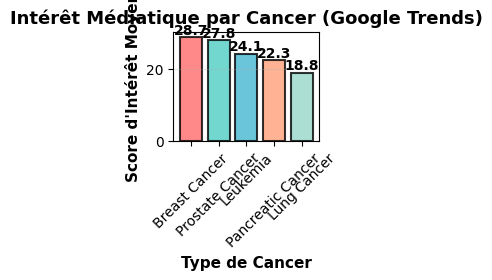

In [47]:
ax1 = plt.subplot(3, 3, 1)
bars = ax1.bar(df_trends_merged['Cancer'], df_trends_merged['Mean_Interest_Score'],
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax1.set_ylabel('Score d\'Intérêt Moyen', fontsize=11, fontweight='bold')
ax1.set_title('Intérêt Médiatique par Cancer (Google Trends)', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

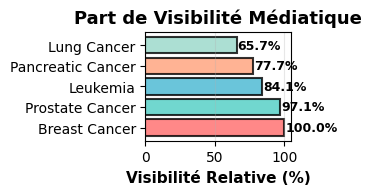

In [48]:
ax2 = plt.subplot(3, 3, 2)
bars2 = ax2.barh(df_trends_merged['Cancer'], df_trends_merged['Relative_Visibility_%'],
                 color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Visibilité Relative (%)', fontsize=11, fontweight='bold')
ax2.set_title('Part de Visibilité Médiatique', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%',
            ha='left', va='center', fontweight='bold', fontsize=9)

Text(0.5, 1.0, "Répartition de l'Attention Médiatique")

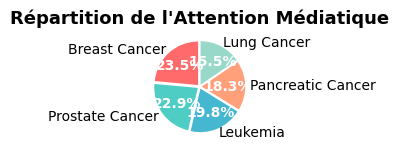

In [49]:
ax3 = plt.subplot(3, 3, 3)
wedges, texts, autotexts = ax3.pie(df_trends_merged['Relative_Visibility_%'],
                                     labels=df_trends_merged['Cancer'],
                                     autopct='%1.1f%%',
                                     startangle=90,
                                     colors=colors,
                                     explode=[0.05] * len(df_trends_merged))
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)
ax3.set_title('Répartition de l\'Attention Médiatique', fontsize=13, fontweight='bold')

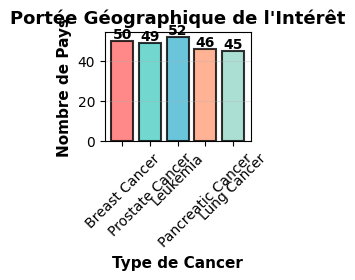

In [50]:
ax5 = plt.subplot(3, 3, 5)
bars5 = ax5.bar(df_trends_merged['Cancer'], df_trends_merged['Countries_Count'],
                color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax5.set_xlabel('Type de Cancer', fontsize=11, fontweight='bold')
ax5.set_ylabel('Nombre de Pays', fontsize=11, fontweight='bold')
ax5.set_title('Portée Géographique de l\'Intérêt', fontsize=13, fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(axis='y', alpha=0.3)

for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

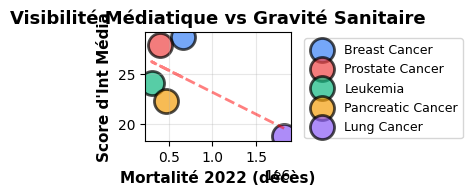

In [51]:
ax6 = plt.subplot(3, 3, 6)

colors = ['#3b82f6', '#ef4444', '#10b981', '#f59e0b', '#8b5cf6']

for i, cancer in enumerate(df_trends_merged['Cancer']):
    ax6.scatter(
        df_trends_merged.loc[i, 'Mortality_2022'],
        df_trends_merged.loc[i, 'Mean_Interest_Score'],
        s=300,
        c=colors[i],
        alpha=0.7,
        edgecolors='black',
        linewidth=2,
        label=cancer
    )

# Labels et titre
ax6.set_xlabel('Mortalité 2022 (décès)', fontsize=11, fontweight='bold')
ax6.set_ylabel("Score d'Int Média", fontsize=11, fontweight='bold')
ax6.set_title('Visibilité Médiatique vs Gravité Sanitaire', fontsize=13, fontweight='bold')

# Légende positionnée à droite
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Grille
ax6.grid(True, alpha=0.3)

# Ligne de tendance
z = np.polyfit(df_trends_merged['Mortality_2022'], df_trends_merged['Mean_Interest_Score'], 1)
p = np.poly1d(z)
ax6.plot(
    df_trends_merged['Mortality_2022'],
    p(df_trends_merged['Mortality_2022']),
    "r--",
    alpha=0.5,
    linewidth=2,
    label='Tendance'
)

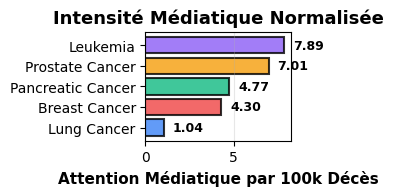

In [52]:
ax7 = plt.subplot(3, 3, 7)
df_sorted_trends = df_trends_merged.sort_values('Media_Attention_per_Death', ascending=True)
bars7 = ax7.barh(df_sorted_trends['Cancer'], df_sorted_trends['Media_Attention_per_Death'],
                 color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax7.set_xlabel('Attention Médiatique par 100k Décès', fontsize=11, fontweight='bold')
ax7.set_title('Intensité Médiatique Normalisée', fontsize=13, fontweight='bold')
ax7.grid(axis='x', alpha=0.3)

for bar in bars7:
    width = bar.get_width()
    ax7.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}',
            ha='left', va='center', fontweight='bold', fontsize=9)

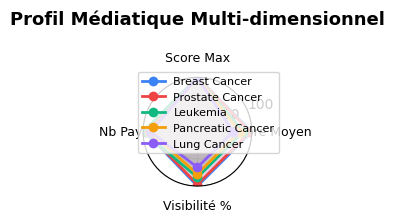

In [53]:
ax8 = plt.subplot(3, 3, 8, projection='polar')
categories = ['Score Moyen', 'Score Max', 'Nb Pays', 'Visibilité %']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i, cancer in enumerate(df_trends_merged['Cancer']):
    # Normaliser les valeurs
    values = [
        df_trends_merged.loc[i, 'Mean_Interest_Score'] / df_trends_merged['Mean_Interest_Score'].max() * 100,
        df_trends_merged.loc[i, 'Max_Score'] / df_trends_merged['Max_Score'].max() * 100,
        df_trends_merged.loc[i, 'Countries_Count'] / df_trends_merged['Countries_Count'].max() * 100,
        df_trends_merged.loc[i, 'Relative_Visibility_%']
    ]
    values += values[:1]
    
    ax8.plot(angles, values, 'o-', linewidth=2, label=cancer, color=colors[i])
    ax8.fill(angles, values, alpha=0.15, color=colors[i])

ax8.set_xticks(angles[:-1])
ax8.set_xticklabels(categories, fontsize=9)
ax8.set_ylim(0, 100)
ax8.set_title('Profil Médiatique Multi-dimensionnel', fontsize=13, fontweight='bold', pad=20)
ax8.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=8)
ax8.grid(True)